In [106]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

dm = pd.read_csv('athlete_events.csv')

#Print all missing values in the dataset

#print(df.isnull().sum())

#Filling missing values of Age, Height and Weight by calculating mean of theier respective coloumns

mis_col = ['Age', 'Height', 'Weight']
for col in mis_col:
    dm[col] = dm[col].fillna(np.mean(dm[col]))
    dm[col] = np.round(dm[col],0)

#dm

#Dropping all data of players who haven't won any medal

a1 = dm.dropna(subset=['Medal'])

#Creating 3 seperate csv files after filtering and cleaning data as 
###refined database, summer olympic db, winter olympic db

a1.to_csv("rd1.csv", index = False)
df = pd.read_csv('rd1.csv')	
#print(df)

a2 = df[df['Season']=='Summer']
a2.to_csv("summer.csv",index = False)
# ds = pd.read_csv('summer.csv')
#print(ds)

a3 = df[df['Season']=='Winter']
a3.to_csv('winter.csv', index = False)
# dw = pd.read_csv('winter.csv')
#print(dw)




In [107]:
##Question -- medal stats for each Sport

cmedals = df.groupby('Sport', as_index = True).agg({'Medal':'count'})
#print(cmedals.sort_values('Medal',ascending = False))


#NOC and Team Duplicates

#print(df.loc[:,['NOC','Team']].drop_duplicates()['NOC'].value_counts().head())


#which country has most no of medals

a= df.groupby(['NOC'], as_index = True).agg({'Medal':'count'})
maxmedals = a.sort_values(['Medal'], ascending = False)

#grouping medals by sport

b = df.groupby(['Sport','NOC'], as_index = True).agg({'Medal':'count'})
medalbysport = b.sort_values(['Sport','Medal'], ascending = False)

#top 10 countries with most no of medals

t = df.groupby(['Sport'], as_index = True).agg({'Medal':'count'})
top10 = t.sort_values('Medal', ascending=False).head(10)

#print(maxmedals)
#print(medalbysport)
#print(top10)




#Country with most no of medals in a specific sport
# top = df.groupby(['Sport','NOC'], as_index = True)['Sport'].agg({'Medal':'count'}).sort_values(['Medal'], ascending = False)
# print(top)
######find unique######
top = df.groupby(['Sport','NOC'], as_index = True).agg({'Medal':'count'}).sort_values(['Medal'], ascending = False)
#print(top)

#top1 = top.groupby(['Sport','NOC','Medal'], as_index = True).agg({'Sport':'unique'})
#top.get_group('Swimming')
# ds.loc[:,'Sport'].unique()




In [97]:
#No of events for each Game
#summer
yearsplit = ds.sort_values(['Year','Season'],ascending = False)
z = yearsplit[['Sport','Event']]
eventsplit = z.groupby(['Sport'], as_index = True).agg({'Event':'nunique'}).sort_values('Event',ascending =False)
#print(eventsplit.head(10))

            Event
Sport            
Athletics      83
Shooting       78
Swimming       52
Cycling        42
Sailing        37
Wrestling      29
Archery        28
Canoeing       27
Rowing         25
Gymnastics     25


In [98]:
#top medal winning countries in last 25 years 

yearsplit = df[df['Year'].between(1990,2016, inclusive = True)].sort_values(['Year','Season'],ascending = False)
top25c = yearsplit.groupby(['NOC'], as_index = True).agg({'Medal':'count'}).sort_values('Medal', ascending = False).head(10)
#print(top25c)

Text(0.5, 1.0, 'Medal distribution')

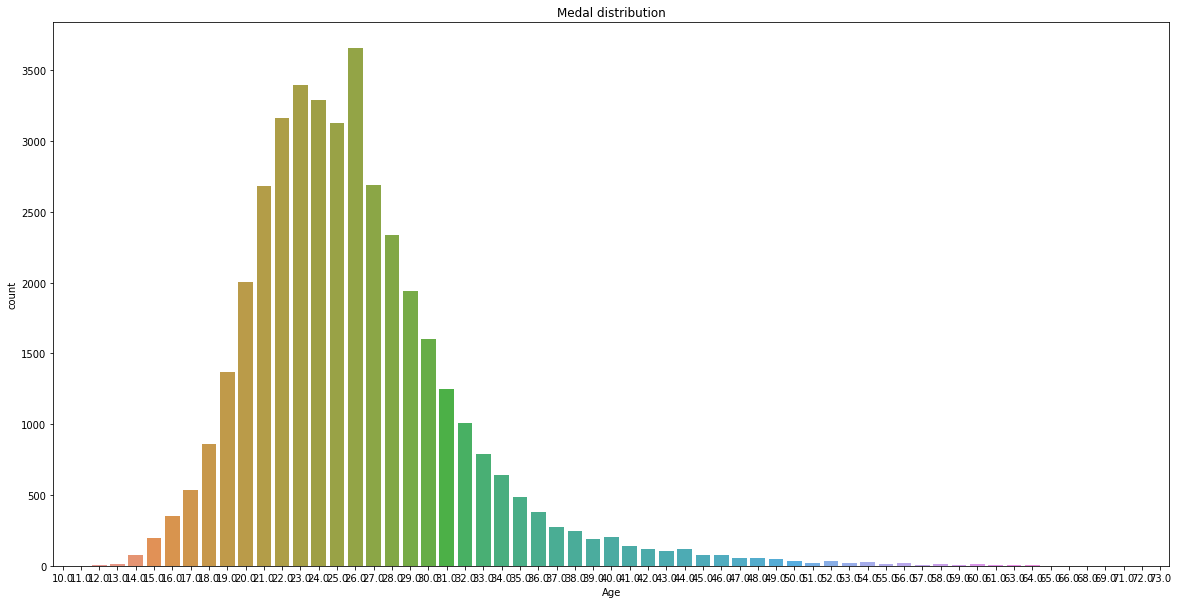

In [114]:
#MEDAL count FOR EACH AGE

medals = df
#medals.head()
medals = medals[np.isfinite(medals['Age'])]

# plt.figure(figsize=(20,10))
# plt.tight_layout()
# sns.countplot(medals['Age'])
# plt.title('Medal distribution')

In [113]:

#medals won before/after/at that particular age

#print(df['ID'][df['Age']==26].count())

3656


In [ ]:
#MAPPING THE HOST CITY TO REPECTIVE COUNTRY
df=pd.read_csv("rd1.csv")
df
#average age
t5s=df.groupby("Sport", as_index=False).agg({"Medal":'count'}).nlargest(5,"Medal")
l=list(t5s.loc[:,"Sport"])
l
def fun(i):
    ss=df[df['Sport']==i]
    yearsplit = ss[ss['Year'].between(1900,2016, inclusive = True)].sort_values(['Year','Season'],ascending = False)
    return yearsplit.groupby(['Year','Sport'], as_index=False).agg({'Age':'mean'})

a=fun(l[0])
b=fun(l[1])
c=fun(l[2])
d=fun(l[3])
e=fun(l[4])
frames=[a,b,c,d,e]
result=pd.concat(frames)
result
######################################################
top 5 countrtop 5 sport top 5 sports person
x=df.groupby('Sport',as_index=False)['Medal'].count().nlargest(5,'Medal')
l=list(x["Sport"])
def fun(i):
    y=df[df["Sport"] == i]
    return y.groupby(["Sport","Name"],as_index=False).agg({"Medal":"count"}).nlargest(5,"Medal")

p=fun(l[0])
q=fun(l[1])
r=fun(l[2])
s=fun(l[3])
w=fun(l[4])
frames1=[p,q,r,s,w]
result=pd.concat(frames1)
result=result.reset_index()
#result.drop(result.index[0], inplace=True)
result.drop('index', axis=1, inplace=True)
result


In [ ]:
city_to_country = {'Mexico City':'Mexico' ,
                   'Berlin':'Germany',
                   'Munich':'Germany',
                   'Garmisch-Partenkirchen':'Germany',
                   'Montreal':'Canada',
                   'Calgary':'Canada',
                   'Vancouver':'Canada',
                  'Stockholm':'Sweden',
                  'Moskva':{'Russia','Soviet Union'},
                   'Sochi':'Russia',
                   'St. Louis':'USA',
                   'Lake Placid':'USA',
                   'Los Angeles':'USA',
                   'Atlanta':'USA',
                  'Squaw Valley':'USA',
                   'Salt Lake City':'USA',
                   'Seoul':'South Korea' ,
                  'Barcelona':'Spain' ,
                  'Helsinki':'Finland',
                  'Innsbruck':'Austria' ,
                  'Melbourne':'Australia',
                  'Sydney':'Australia',
                   'Athina':'Greece' ,
                  'Beijing':'China' ,
                  'Antwerpen':'Belgium',
                  "Cortina d'Ampezzo":'Italy',
                   'Roma':'Italy',
                   'Torino':'Italy',
                  'London':'UK',
                  'Amsterdam':'Netherlands',
                  'Tokyo':'Japan',
                   'Sapporo':'Japan',
                   'Nagano':'Japan',
                   'Oslo':'Norway',
                   'Lillehammer':'Norway',
                  'Sarajevo':'Yugoslavia' ,
                  'Sankt Moritz':'Switzerland',
                   'Paris':'France',
                   'Chamonix':'France',
                   'Albertville':'France',
                   'Grenoble':'France',
                  'Rio de Janeiro':'Brazil'}

In [ ]:
#######################################################

 #   JUNK      #
    
#top10.iloc[:,] 
#top10['Athletics','Swimming','Rowing','Gymnastics','Fencing','Football','Hockey','Wrestling','Cycling','Sailing']
#a = z.groupby(['Sport','NOC'])['Medal'].count()
# a.to_csv('sport.csv', header = 'Sport''NOC''Medal').
# sp = read_csv('sport.csv')
#z = ds[['NOC', 'Sport', 'Medal']].copy()
#z.sort_values('NOC')
# n = z.groupby(['Sport','NOC'], as_index = True)['Medal'].count()
# type(n)
#m = n.nlargest(50)
#m
#m['NOC'].sort()
# n.to_csv('sport.csv', header = 'Sport''NOC''Medal')
# sp = pd.read_csv('sport.csv').
# sp

# n = z.groupby(['Sport', 'NOC'], as_index = True).agg({'Medal':'count'})
# n.sort_values(['Medal'], ascending=False)
# n
#sportevents.to_csv('sport.csv', header = 'Sport''NOC''Medal')
#sp = pd.read_csv('sport.csv')

# k = n.groupby(['Sport'])['Medal'].nlargest(5)
# k

# for name, group in medalbysport.groupby('Sport'): 
#      print(name)
#      print(group)


###############################################################